<a href="https://colab.research.google.com/github/qusai406/DS230-Final-Project/blob/main/06_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Drive Link**



هاي الخطوة ربط قوقل درايف في كولاب
للسماح بالوصول لمجموعات البيانات المخزنه في درايف

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Library Import**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

# **Data path on Drive**

تحديد المجلد اللي مخزن فيه مجموعات البيانات

In [3]:
DATA = '/content/drive/MyDrive/DS230_data/'

# Data **Loading**

هاي المجموعات فيها معلومات على مستوى الطلب , بيانات وتصفية للمنتجات , تفاصيل الفئات الهرمية ,

In [4]:
orders = pd.read_csv(DATA + 'orders.csv')
order_products = pd.read_csv(DATA + 'order_products__prior.csv')
products = pd.read_csv(DATA + 'products.csv')
aisles = pd.read_csv(DATA + 'aisles.csv')
departments = pd.read_csv(DATA + 'departments.csv')

# **Data Merge**

بهاض القسم بدمج بيانات مستوى الطلب مع معلومات المنتج عشان يتم انشاء مجموعه بيانات موحده للتحليل


In [5]:
df = order_products.merge(orders, on="order_id", how="left")
df = df.merge(products, on="product_id", how="left")

df.head()


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


# **Sampling**

تقليل حجم مجموعه البيانات وبساعد على تحسين الاداء الحسابي مع الحفاظ على التوزيع العام للبيانات

In [6]:
df_eda = df.sample(n=100000, random_state=42)
df_eda.shape

(100000, 13)

# Final **Merging**

بهاض القسم يتم الدمج النهائي من ربط البيانات المتعلقه بالمنتجات مع مجموعه البيانات الرئيسيه
وبتضمن هاي الخطوه توفر جميع المعلومات التصنيفيه لإجراء التحليل الاستكشافي والنمذجه اللاحقه

In [7]:
df_eda = df_eda.merge(aisles, on="aisle_id", how="left")
df_eda = df_eda.merge(departments, on="department_id", how="left")
df_eda.head()
df_eda.info()
#دمج معلومات الممرات والاقسام في اطار بيانات
#EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                100000 non-null  int64  
 1   product_id              100000 non-null  int64  
 2   add_to_cart_order       100000 non-null  int64  
 3   reordered               100000 non-null  int64  
 4   user_id                 100000 non-null  int64  
 5   eval_set                100000 non-null  object 
 6   order_number            100000 non-null  int64  
 7   order_dow               100000 non-null  int64  
 8   order_hour_of_day       100000 non-null  int64  
 9   days_since_prior_order  93634 non-null   float64
 10  product_name            100000 non-null  object 
 11  aisle_id                100000 non-null  int64  
 12  department_id           100000 non-null  int64  
 13  aisle                   100000 non-null  object 
 14  department           

# **Exploratory Data Analysis (EDA)**

Post-merge dataset overview




بهاض القسم بعطي نظرة عامه على مجموعه البيانات بعد جميع خطوات الدمج

In [8]:
df_eda.shape
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                100000 non-null  int64  
 1   product_id              100000 non-null  int64  
 2   add_to_cart_order       100000 non-null  int64  
 3   reordered               100000 non-null  int64  
 4   user_id                 100000 non-null  int64  
 5   eval_set                100000 non-null  object 
 6   order_number            100000 non-null  int64  
 7   order_dow               100000 non-null  int64  
 8   order_hour_of_day       100000 non-null  int64  
 9   days_since_prior_order  93634 non-null   float64
 10  product_name            100000 non-null  object 
 11  aisle_id                100000 non-null  int64  
 12  department_id           100000 non-null  int64  
 13  aisle                   100000 non-null  object 
 14  department           

Missing Values



القيم الناقصه اغلبها بالميزات الزمنيه وهاض طبيعي بالطلبات الاولى فتركناها بدون معالجة عشان نتفادى التحيز

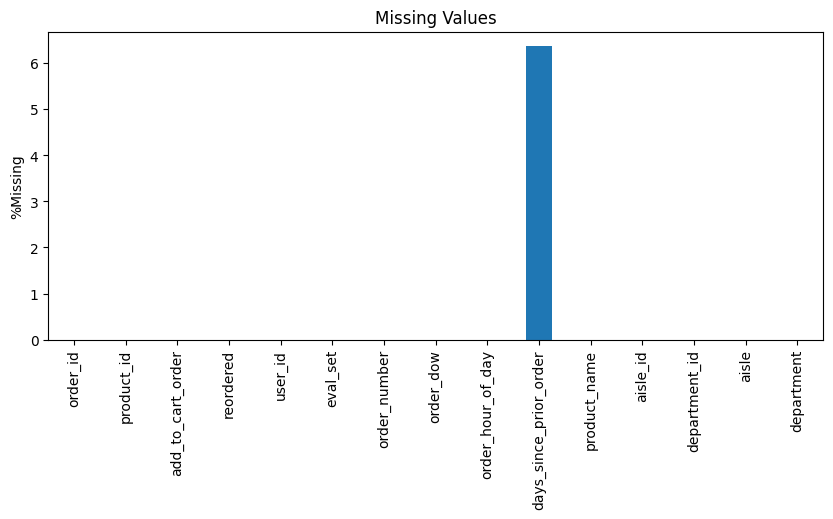

In [9]:
df_eda.isna().sum()
(df_eda.isna().mean() * 100).plot(kind="bar",figsize=(10,4))
plt.title("Missing Values")
plt.ylabel("%Missing")
plt.show()
#تحقق من نسبة القيم المفقودة لكل عامود وعرضها بيانيا


Target Distribution



بظهر المتغير اللي مستهدفينه عدم توازن بالفئات وهاض بخلينا نستخدم

نماذج ROC-AUC

وبعض النماذج المعتمده على الأشجار
اللي بتتعامل مع عدم التوازن

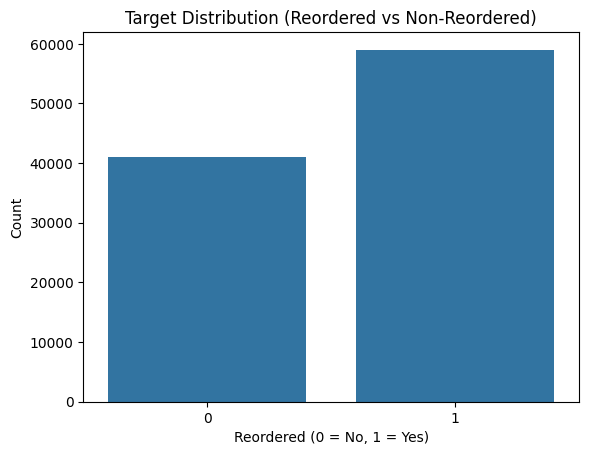

Reorder rate: 59.01%


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="reordered", data=df_eda)
plt.title("Target Distribution (Reordered vs Non-Reordered)")
plt.xlabel("Reordered (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print(f"Reorder rate: {df_eda['reordered'].mean():.2%}")
#رسم توزيع المتغير المستهدف وطباعة معدل إعادة الطلب

Target vs Key Numeric Features



هاض القسم فيه كيفية اختلاف بعض الخصائص الرقميه المختاره بين المنتجات اللي انعاد ترتيبها والمنتجات اللي ما انعاد ترتيبها

بساعد فهم هاي العلاقات على تفسير سلوك الشراء وبحفز اختيار الخصائص المناسبه للتصنيف

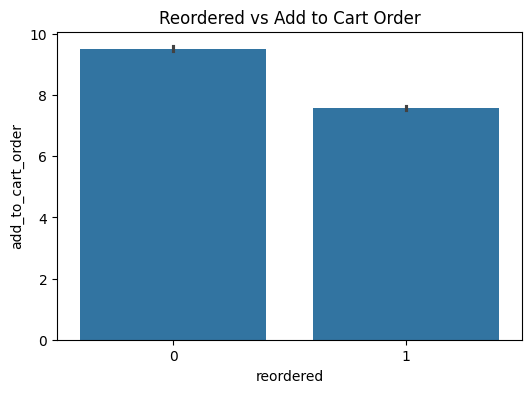

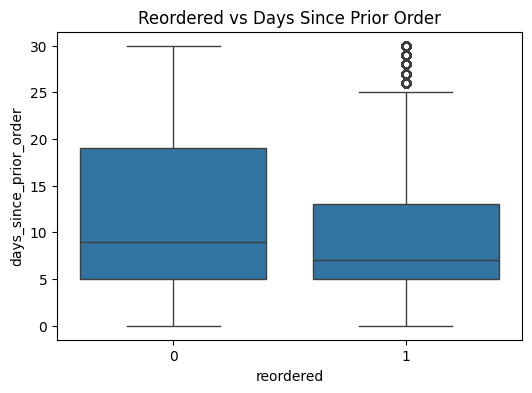

In [11]:

plt.figure(figsize=(6, 4))
sns.barplot(x="reordered", y="add_to_cart_order", data=df_eda)
plt.title("Reordered vs Add to Cart Order")
plt.show()
#تحليل العلاقه بين طلب الاضافه للسله وسلوك اعادة الطلب


plt.figure(figsize=(6, 4))
sns.boxplot(x="reordered", y="days_since_prior_order", data=df_eda)
plt.title("Reordered vs Days Since Prior Order")
plt.show()
#تحليل العلاقه بين عدد الايام من الطلب السابق وسلوك اعادة الطلب

Numeric Feature Distributions



تظهر الخصائص العدديه توزيعات منحرفه وقيم شاذه بس عشان النماذج اللي معتمده على الأشجار بتمتلك متانه بمواجهة مثل هيك انماط ما صار اي تطبيق ازالة للقيم الشاذه

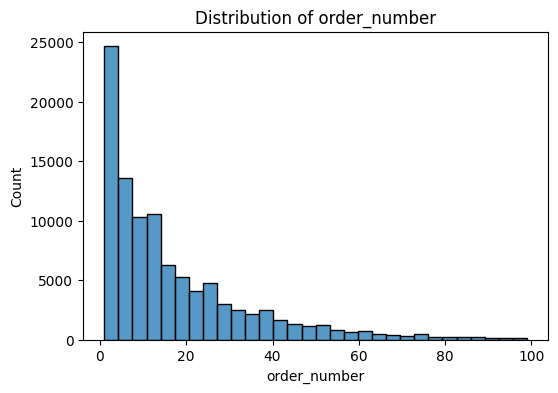

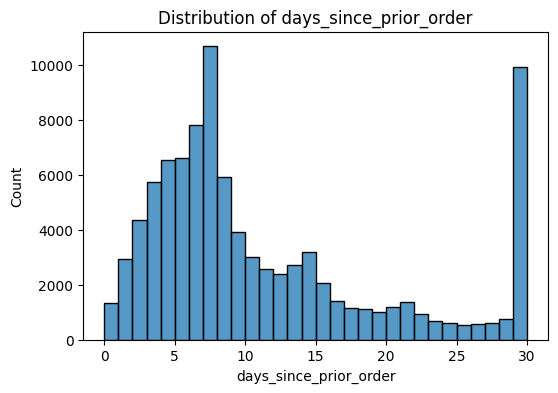

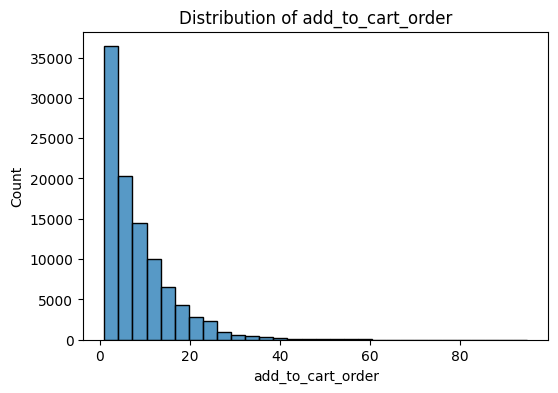

In [12]:
num_cols = [
    "order_number",
    "days_since_prior_order",
    "add_to_cart_order",

]

for col in num_cols:
  plt.figure(figsize=(6, 4))
  sns.histplot(df_eda[col].dropna(),bins=30)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()
#رسم توزيع السمات العدديه اللي تم اختيارها

Correaltion Analysis




بهاض القسم موجود العلاقات الخطيه بين السمات الرقميه والمتغير المستهدف

بساعد تحليل الارتباط في تحديد السمات الاكثر ارتباط مع احتمالية اعادة الطلب


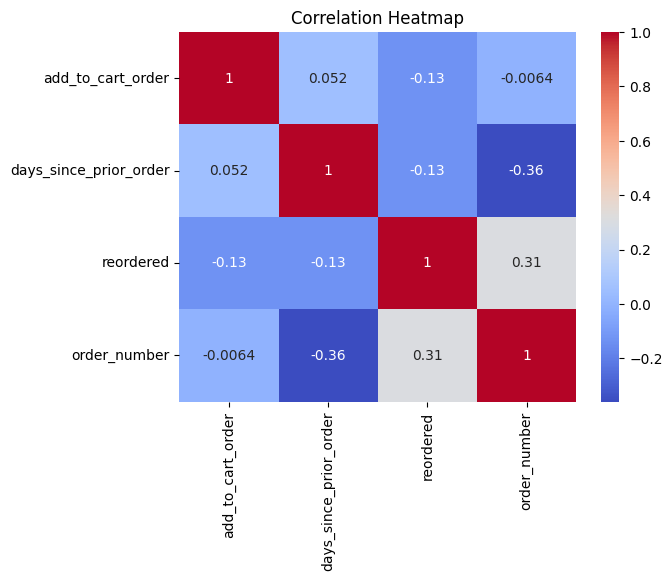

In [13]:
corr_cols = ["add_to_cart_order", "days_since_prior_order", "reordered","order_number"]
sns.heatmap(df_eda[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
#اظهار الارتباطات بين السمات العدديه المختاره باستخدام طريقه حراريه

Correlation with Target



بحلل هاض القسم قوة واتجاه العلاقه الخطيه بين الخصائص العدديه والمتغير المستهدف بعد ترتيبه

بساعد تحديد الخصائص اللي الها ارتباط عالي بالمتغير المستهدف في تحفيز اختيار الخصائص وبوفر فهم للعوامل اللي بتأثر في سلوك اعادة الطلب

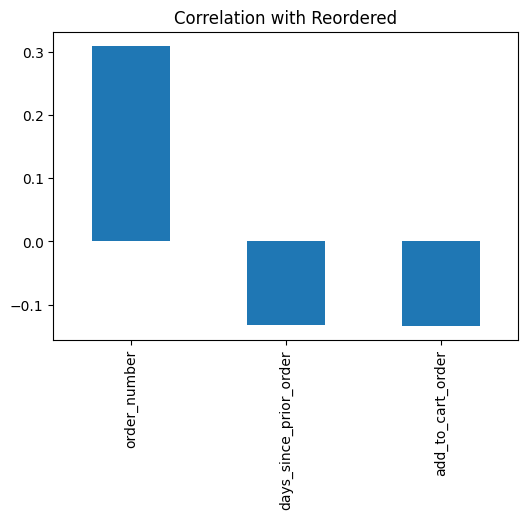

In [14]:
corr_target=df_eda[num_cols + ["reordered"]].corr()["reordered"].sort_values(ascending=False)
plt.figure(figsize=(6, 4))
corr_target.drop("reordered").plot(kind="bar")
plt.title("Correlation with Reordered")
plt.show()
#تحليل العلاقه بين الخصائص العدديه والمتغير المستهدف


Time-based ordering patterns



هاض القسم بستكشف أنماط زمنية في سلوك الشراء عند المستخدمين عن طريق تحليل الطلبات خلال ايام الاسبوع وساعات اليوم

وبساعد فهم هاي الأنماط على ملاحظة التأثيرات المرتبطه بالوقت واللي يمكن تأثر على سلوك إعادة الطلب
وبدعم اتخاذ قرارات نمذجه بتراعي عامل الوقت

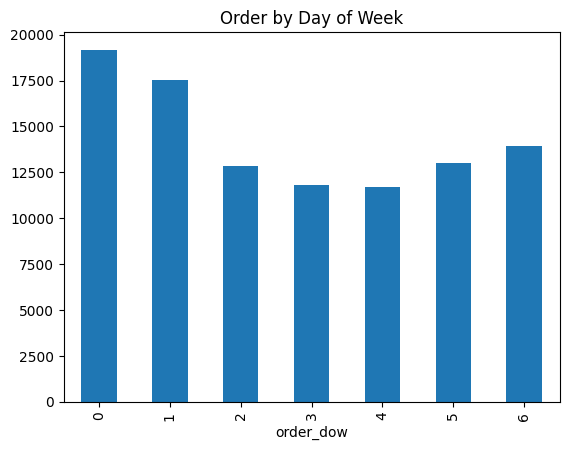

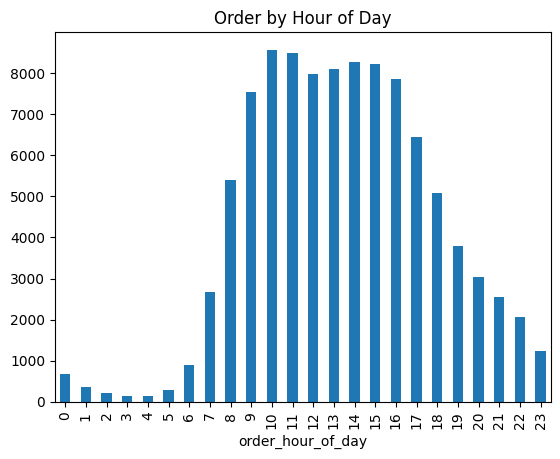

In [15]:
df_eda["order_dow"].value_counts().sort_index().plot(kind="bar")
plt.title("Order by Day of Week")
plt.show()

df_eda["order_hour_of_day"].value_counts().sort_index().plot(kind="bar")
plt.title("Order by Hour of Day")
plt.show()
#تحليل توزيع الطلبات حسب يوم الاسبوع وساعة اليوم

Outlier Analysis



بهاض القسم في قيم شاذه محتمله في السمات العدديه باستخدام مخططات الصندوق

على الرقم من وجود قيم متطرفه ما صار أي ازالة صريحه للقيم الشاذه لانه نماذج المعتمده على الاشجار بتتميز بمقاومتها للقيم الشاذه وما بتعتمد على افتراضات

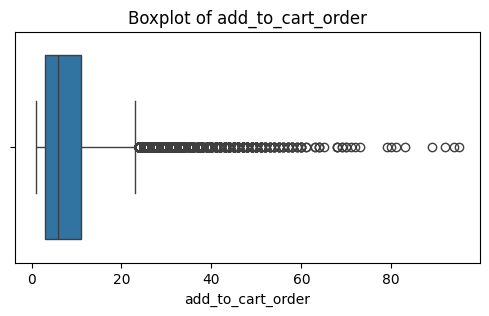

add_to_cart_order → Outlier Count: 4262


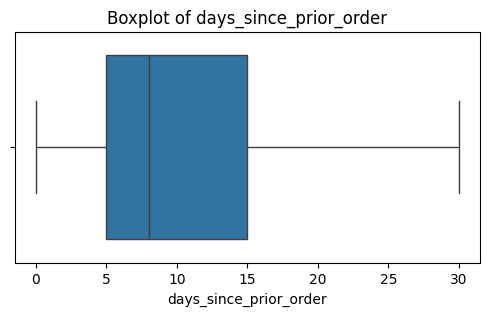

days_since_prior_order → Outlier Count: 0


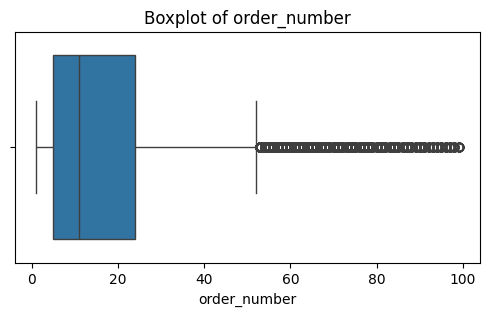

order_number → Outlier Count: 5382


In [16]:
num_cols = ["add_to_cart_order", "days_since_prior_order", "order_number"]

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_eda[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    q1 = df_eda[col].quantile(0.25)
    q3 = df_eda[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df_eda[(df_eda[col] < lower) | (df_eda[col] > upper)]
    print(f"{col} → Outlier Count:", outliers.shape[0])
    #تحديد القيم الشاذه بالخصائص العدديه باستخدام مخططات الصندوق

Distribution of Key Categorical Features



هاض القسم بستكشف توزيع سمات فئوية مختاره لفهم تكرارها واهميتها النسبيه ضمن مجموعه البيانات
وبساعد تحليل هاي التوزيعات على تحديد الفئات المنتشره وبقدم رؤيه واضحه لتنظيم المنتج وتكوين البيانات

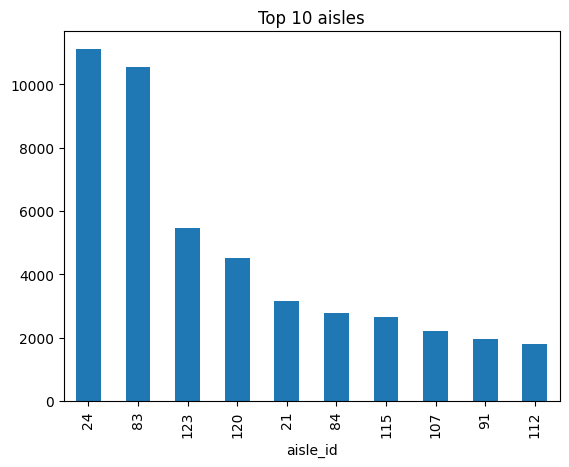

In [17]:
df_eda["aisle_id"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 aisles")
plt.show()
#عرض اكثر 10 ممرات تردد

# **Feature Engineering**

بهاض القسم يتم تصميم خصائص سلوك المستخدم على مستوى المستخدم لرصد أنماط الشراء وخصائص سلة المشتريات وسلوك إعادة الطلب وبعدين بتم استخدامها كمدخلات لنماذج التصنيف

User-Level Features

In [18]:
df_feat = df_eda.copy()
user_total_orders = df_feat.groupby("user_id")["order_number"].max()
user_total_orders = user_total_orders.reset_index()
user_total_orders.columns = ["user_id", "user_total_orders"]
user_total_orders.head()
#حساب اجمالي عدد الطلبات لكل مستخدم

basket_size = df_feat.groupby(["user_id", "order_id"])["product_id"].count()
basket_size = basket_size.reset_index()
basket_size.columns = ["user_id", "order_id", "basket_size"]
#حساب عدد المنتجات في كل طلب لكل مستخدم

user_avg_basket = basket_size.groupby("user_id")["basket_size"].mean()
user_avg_basket = user_avg_basket.reset_index()
user_avg_basket.columns = ["user_id", "user_avg_basket_size"]
user_avg_basket.head()
#حساب متوسط حجم سلة التسوق لكل مستخدم

user_reorder_ratio = df_feat.groupby("user_id")["reordered"].mean()
user_reorder_ratio = user_reorder_ratio.reset_index()
user_reorder_ratio.columns = ["user_id", "user_reorder_ratio"]
user_reorder_ratio.head()
#حساب نسبة إعادة الطلب لكل مستخدم


user_mean_days = df_feat.groupby("user_id")["days_since_prior_order"].mean()
user_mean_days = user_mean_days.reset_index()
user_mean_days.columns = ["user_id", "user_mean_days_since_prior"]
user_mean_days.head()
#حساب متوسط عدد الايام بين الطلبات لكل مستخدم


user_recency = df_feat.groupby("user_id")["days_since_prior_order"].last()
user_recency = user_recency.reset_index()
user_recency.columns = ["user_id", "user_last_order_recency"]
user_recency.head()
#حساب عدد الايام من اخر طلب لكل مستخدم


user_features = user_total_orders.merge(user_avg_basket, on="user_id", how="left")
user_features = user_features.merge(user_reorder_ratio, on="user_id", how="left")
user_features = user_features.merge(user_mean_days, on="user_id" , how="left")
user_features = user_features.merge(user_recency, on="user_id", how="left")
user_features.head()
#دمج جميع ميزات مستوى المستخدم في إطار بيانات واحد

,user_id,user_total_orders,user_avg_basket_size,user_reorder_ratio,user_mean_days_since_prior,user_last_order_recency
0,2,12,1.0,1.0,28.0,28.0
1,7,11,1.0,0.5,6.0,6.0
2,9,3,1.0,1.0,30.0,30.0
3,14,8,1.0,0.0,27.0,27.0
4,17,36,1.0,1.0,30.0,30.0


Product-Level Features

هون يتم انشاء خصائص على مستوى المنتج بتمثل مدى رواج المنتج بشكل عام
وميل المنتج لإعادة الطلب
ومتوسط موقعه في سلة التسوق وبتساعد هاي الخصائص على نمذجة سلوك الشراء الخاص بكل منتج

In [19]:
product_orders = df_feat.groupby("product_id")["order_id"].count()
product_orders = product_orders.reset_index()
product_orders.columns = ["product_id", "product_total_orders"]
product_orders.head()
#إجمالي عدد مرات شراء كل منتج

product_reorder_rate = df_feat.groupby("product_id")["reordered"].mean()
product_reorder_rate = product_reorder_rate.reset_index()
product_reorder_rate.columns = ["product_id", "product_reorder_rate"]
product_reorder_rate.head()
#نسبة مرات إعادة طلب المنتج

product_cart_position = df_feat.groupby("product_id")["add_to_cart_order"].mean()
product_cart_position = product_cart_position.reset_index()
product_cart_position.columns = ["product_id", "product_avg_cart_position"]
product_cart_position.head()
#متوسط موقع المنتج في سلة السوق

product_features = product_orders.merge(product_reorder_rate, on="product_id", how="left")
product_features = product_features.merge(product_cart_position, on="product_id", how="left")
product_features.head()
#دمج جميع ميزات المنتج في إطار بيانات واحد


,product_id,product_total_orders,product_reorder_rate,product_avg_cart_position
0,1,5,0.800000,6.200000
1,9,1,0.000000,14.000000
2,10,13,0.692308,8.538462
3,22,2,0.000000,6.000000
4,23,3,0.000000,10.000000


User-Product Interaction Features

هون يتم تصميم ميزات قائمة على التفاعل بين المستخدمين والمنتجات ويعكس سلوك الشراء الشخصي مثل تكرار الشراء وميل اعادة الطلب

In [20]:
user_product_count = (
    df_feat.groupby(["user_id", "product_id"])["order_id"]
    .count()
    .reset_index(name="user_product_purchase_count")
)
user_product_count.head()
#حساب عدد مرات الشراء كل مستخدم لكل منتج


user_product_reorder_rate = (
    df_feat.groupby(["user_id", "product_id"])["reordered"]
    .mean()
    .reset_index(name="user_product_reorder_rate")
)
user_product_reorder_rate.head()
#حساب نسبة اعادة طلب مستخدم لكل منتج


df_feat_sorted = df_feat.sort_values(["user_id", "product_id", "order_number"])
user_product_last_day = (
    df_feat_sorted.groupby(["user_id", "product_id"])["days_since_prior_order"]
    .last()
    .reset_index(name = "user_product_days_since_last_purchase")
)
user_product_last_day.head()
#حساب عدد الايام من اخر عملية شراء كل مستخدم لكل منتج


user_product_features = (
    user_product_count
        .merge(user_product_reorder_rate, on=["user_id", "product_id"], how="left")
        .merge(user_product_last_day, on=["user_id", "product_id"], how="left")
)
user_product_features.head()
#دمج ميزات المستخدم مع المنتج في إطار بيانات واحد


,user_id,product_id,user_product_purchase_count,user_product_reorder_rate,user_product_days_since_last_purchase
0,2,19156,1,1.0,28.0
1,7,29871,1,0.0,NaN
2,7,37602,1,1.0,6.0
3,9,481,1,1.0,30.0
4,14,15673,1,0.0,27.0


Temporal Features

يتم تصميم السمات الزمنيه لالتقاط انماط الطلب عبر ايام الاسبوع واوقات مختلفه من اليوم وهالاشي يمكن يأثر على سلوك إعادة الطلب

In [21]:
temporal_features = df_feat[["order_id", "user_id", "order_dow", "order_hour_of_day"]].drop_duplicates()
#ايجاد ميزات زمنيه مثل يوم الطلب وساعة الطلب

temporal_features["is_weekend"] = temporal_features["order_dow"].isin([0,6]).astype(int)
#انشاء متغير بحدد اذا الطلب في علطة نهاية الاسبوع او لا

def time_of_day(hour):
    if 5 <= hour < 12:
      return "morning"
    elif 12 <= hour < 17:
      return "afternoon"
    elif 17 <= hour < 21:
      return "evening"
    else:
      return "night"

temporal_features["time_of_day"] = temporal_features["order_hour_of_day"].apply(time_of_day)
#تقسيم وقت الطلب لفترات

time_map = {"morning":0, "afternoon":1, "evening":2, "night":3}
temporal_features["time_of_day_code"] = temporal_features["time_of_day"].map(time_map)
#تحويل الفترات الزمنية لفترات رقمية

df_feat = df_feat.merge(temporal_features[["order_id", "is_weekend", "time_of_day_code"]], on="order_id", how="left")
df_feat[["order_id", "is_weekend", "time_of_day_code"]].head()
#دمج الفترات الزمنيه مع اطار البيانات الرئيسي

,order_id,is_weekend,time_of_day_code
0,3109255,1,2
1,301098,0,1
2,1181866,0,2
3,1678630,1,1
4,644090,1,2


Nom-Linear Feature Transformation

بتطبق التحويلات غير الخطيه لتقليل الانحراف في الميزات الرقميه غير المتوازنه بشده وتحسين متانة النموذج

In [22]:
df_feat = df_feat.merge(user_features[["user_id", "user_total_orders"]],on="user_id",how="left")
df_feat["log_user_total_orders"] = np.log1p(df_feat["user_total_orders"])
#هون اخترت احول لوغاريتمي عشان اقلل انحراف عدد الطلبات


Categorical Feature Encoding

One-Hot Encoding

بتم ترميز المتغيرات الفئويه باستخدام الترميز الأحادي لتحويلها لتمثيلات رقميه مناسبه لنماذج التعلم الآلي

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_features = ohe.fit_transform(df_feat[[ "department", "aisle"]])
ohe_features_names = ohe.get_feature_names_out(["department", "aisle"])
ohe_df = pd.DataFrame(ohe_features, columns=ohe_features_names, index=df_feat.index)
df_feat = pd.concat([df_feat, ohe_df], axis=1)
#تحويل القيم النصيه لأعمدة رقمية


Target Encoding

يتم استخدام ترميز الهدف لترميز السمات الفئويه اللي الها عدد كبير عن طريق استبدال الفئات باحصاءات قائمه على الهدف

In [24]:

global_mean = df_feat["reordered"].mean()
product_mean = df_feat.groupby("product_id")["reordered"].mean()
product_count = df_feat.groupby("product_id")["reordered"].count()
smoothing = 10
product_target_enc = (product_mean * product_count + global_mean * smoothing) / (product_count + smoothing)
df_feat["product_target_enc"] = df_feat["product_id"].map(product_target_enc)
#بمثل كل منتج بقيمة رقميه عشان تعكس احتمال طلبه

user_freq = df_feat["user_id"].value_counts(normalize=True)
df_feat["user_freq"] = df_feat["user_id"].map(user_freq)
#بمثل كل مستخدم بقيمه رقميه عشان اشوف عدد تكراره في البيانات


عشان أبسط الأمور طبقت التشفير قبل تدريب النموذج .

في بيئة الإنتاج يجب تطبييق التشفير على بيانات التدريب لتجنب تسريب البيانات

# **Train-Validation split**

تقسيم بيانات التدريب والتحقق عشان نضمن تقييم واقعي ومنع تسرب البيانات يتم تطبيق تقسيم بيانات التدريب والتحقق مع مراعاة الوقت

لكل مستخدم يتم استخدام جميع الطلبات باستثناء أحدثها والطلب الأخير بتخصص للتحقق


In [25]:
#Time-aware
df_feat["max_order_number"] = df_feat.groupby("user_id")["order_number"].transform("max")

train_df = df_feat[df_feat["order_number"] < df_feat["max_order_number"]]
val_df = df_feat[df_feat["order_number"] == df_feat["max_order_number"]]

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
#قسمنا البيانات من حيث الزمن عشان النموذج يتم بناءه على الطلبات اللي قبل ونختبره على اخر طلب لكل مستخدم عشان نتجنب تسريب المعلومات لانه يمكن يشوف معلومات من المستقبل وهيك بتصير النتائج مش واقعية

Train shape: (35742, 177)
Validation shape: (64258, 177)


Explicit X / y split

بعد إجراء عملية تقسيم البيانات بين التدريب والتحقق مع مراعاه عامل الوقت يتم تقسيم مجموعه البيانات بشكل صريح لمصفوفات الميزات (X)

ومتجهات الهدف (y)

بتفصل هاي الخطوه ميزات الإدخال عن متغير الهدف عشان تضمن مسار نمذجه واضح ومحدد بدقه


In [26]:
target = "reordered"

X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_val = val_df.drop(columns=[target])
y_val = val_df[target]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (35742, 176)
y_train shape: (35742,)
X_val shape: (64258, 176)
y_val shape: (64258,)


# **Modeling**

## Classfication (Task A)

Remove non-numeric (string) columns


فحص الأعمده غير الرقميه وإزالتها لضمان التوافق مع نماذج التصنيف

In [48]:
non_numeric_cols = X_train.select_dtypes(include=["object"]).columns
X_train = X_train.drop(columns=non_numeric_cols)
X_val   = X_val.drop(columns=non_numeric_cols)

print("Non-numeric columns removed:", list(non_numeric_cols))
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)


Non-numeric columns removed: []
X_train shape: (10723, 172)
X_val shape: (64258, 172)


sampling



عشان اخفف من قيود الذاكرة اثناء تدريب النموذج

In [49]:
X_train = X_train.sample(frac=0.3, random_state=42)
y_train = y_train.loc[X_train.index]


Logistic Regreission

يسنخدم الانحدار اللوجستي كنموذج أساسي بسبب بساطته وقابليته للتفسير وملاءمته لمهام التصنيف الثنائي

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import pandas as pd


imputer = SimpleImputer(strategy='median')



X_train_imputed_array = imputer.fit_transform(X_train)
X_val_imputed_array = imputer.transform(X_val)


X_train_imputed = pd.DataFrame(X_train_imputed_array, columns=X_train.columns, index=X_train.index)
X_val_imputed = pd.DataFrame(X_val_imputed_array, columns=X_val.columns, index=X_val.index)


log_model = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs = -1)
log_model.fit(X_train_imputed, y_train)
#تدريب نموذج الانحدار اللوجيستي كاساس للتنبؤ باعادة الطلب
#استخدمت(logistic regression)
#لانه مناسب لمشاكل التصنيف الثنائي
#سهل التفسير وبتعامل مع الاحتمالات لهيك هو مناسب للتنبؤ

from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_model.predict(X_val_imputed)
y_prob = log_model.predict_proba(X_val_imputed)[:,1]

print(classification_report(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_prob))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65     27680
           1       0.76      0.56      0.64     36578

    accuracy                           0.65     64258
   macro avg       0.67      0.66      0.65     64258
weighted avg       0.68      0.65      0.65     64258

ROC AUC: 0.7331227943247101


ROC Curve

يستخدم منحنى خصائص تشغيل المستقبل لتقييم اداء نموذج الانحدار من خلال عتبات تصنيف مختلفه

بوضح هاض المنحنى العلاقه بين معدل الاستدعاء ومعدل الايجابيه الكاذبه

بتوفر المساحه تحت منحنى (AUC)

مقياسًا موجزًا لقدرة النموذج على التمييز بين الحالات اللي انعاد ترتيبها والحالات اللي ما انعاد ترتيبها

AUC تشير قيمه الاعلى الى اداء تمييزي أفضل

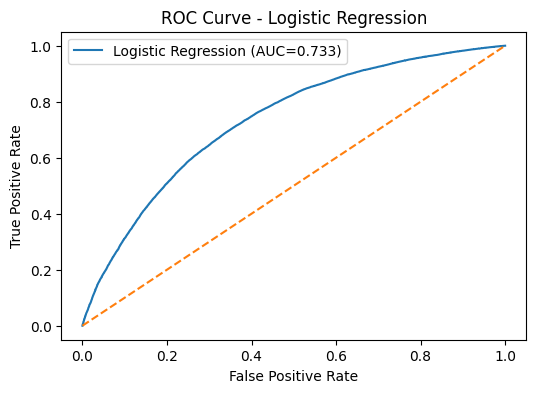

In [32]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()
#رسم منحنى عشان يتصور اداء الانحدارROC
#استخدم الانحدار اللوجستي كنموذج تصنيف أساسي لبساطته وسهولة تفسيره وقوته في التعامل مع مساحات الميزات عالية الأبعاد.
#هو يوفر نقطة مرجعية واضحة لتقييم أداء النماذج الأكثر تعقيد


**XGBoost Classfication Model**



 اخترته كنموذج تصنيف لانه ادائها قوي على البيانات الجدولية وبرضو لقدرته على استيعاب العلاقات غير الخطية المعقدة وتمت مقارنته بخط اساس خطي عشان تقيّم تحسينات الأداء الناتجة عن زيادة تعقيد النموذج

In [33]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, objective="binary:logistic", eval_metric="auc", random_state=42, n_jobs=-1)

xgb_model.fit(X_train, y_train)

from sklearn.metrics import classification_report, roc_auc_score

xgb_pred = xgb_model.predict(X_val)
xgb_pred_proba = xgb_model.predict_proba(X_val)[:, 1]

print("XGBoost Classification Report:\n", classification_report(y_val, xgb_pred))

xgb_roc_auc = roc_auc_score(y_val, xgb_pred_proba)
print("XGBoost ROC AUC:", xgb_roc_auc)

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71     27680
           1       0.77      0.84      0.81     36578

    accuracy                           0.77     64258
   macro avg       0.77      0.76      0.76     64258
weighted avg       0.77      0.77      0.77     64258

XGBoost ROC AUC: 0.8409103767718491


The final evaluation is based on XGBoost, which achieved an accuracy of 0.77, exceeding the required performance threshold.


Confusion Matrix -XGBoost



بتوفر مصفوفه الارتباك تحليل تفصيلي لأداء تصنيف النموذج لأن تظهر عدد النتائج الإيجابيه الصحيحه والخاطئه
والنتائج السلبيه الصحيحه والخاطئه

بتساعد هاي المصفوفه على تحليل انواع الأخطاء اللي برتكبها نموذج XGBoost

وبتقيم قدرته على التمييز بين الحالات اللي انعاد ترتيبها واللي ما انعاد ترتيبها

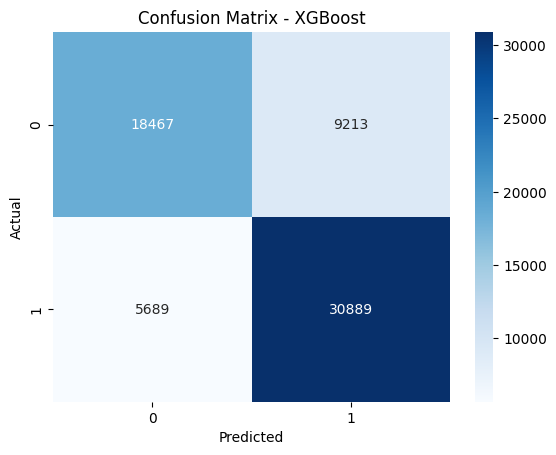

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_val, xgb_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

ROC Curve -XGBoost

يقيّم منحنى خصائص تشغيل المُستقبِل (ROC)

أداء نموذج XGBoost

من خلال عتبات تصنيف مختلفه

وبوضح المفاضله بين معدل الاستدعاء ومعدل الايجابيات الكاذبه

وبتلخص المساحه تحت المنحنى AUC

قدرة النموذج على التمييز بين الفئات لأن تشير قيم AUC

الأعلى الى اداء تنبؤي اقوى

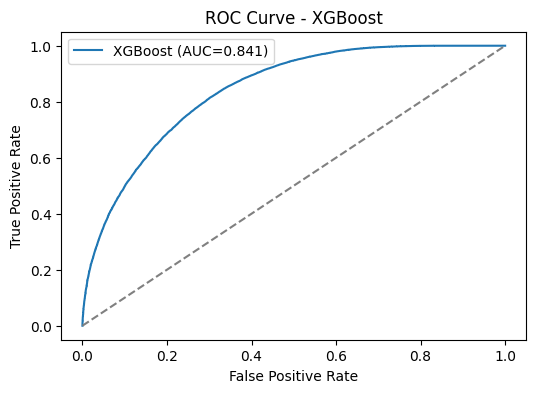

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, xgb_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"XGBoost (AUC={xgb_roc_auc:.3f})")
plt.plot([0,1], [0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


Random Forest Classification Model

نموذج تصنيف الغابات العشوائية

الغابات العشوائية هي طريقه تعلم جماعي بتجمع عدة اشجار قرار لتحسين دقة التنبؤ وتقليل التجاوز

وهي مناسبه بالكامل للتعامل مع العلاقات غير الخطيه وتفاعلات السمات المعقده في مجموعات البيانات الكبيره

يتم ترتيب هاض النموذج باستخدام السمات المهندسه للتنبؤ بما اذا كان سيتم اعادة طلب منتج ما

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1, class_weight="balanced")
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_val)
rf_pred_proba = rf_model.predict_proba(X_val)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_val, rf_pred))
rf_roc_auc = roc_auc_score(y_val, rf_pred_proba)
print("Random Forest ROC AUC:", rf_roc_auc)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72     27680
           1       0.78      0.79      0.79     36578

    accuracy                           0.76     64258
   macro avg       0.75      0.75      0.75     64258
weighted avg       0.76      0.76      0.76     64258

Random Forest ROC AUC: 0.8272901925949994


Confusion Matrix - Random Forest

بتلخص مصفوفه الارتباك نتائج تصنيف نموذج الغابه العشوائيه إذ أن النتائج الإيجابيه الصحيحه والنتائج السلبيه الصحيحه والنتائج الإيجابيه الخاطئه والنتائج السلبيه الخاطئه

بتوفر هاي المصفوفه نظره ثاقبه على انواع الأخطاء اللي برتكبها النموذج وبتساعد في تقييم ادائه بالتصنيف

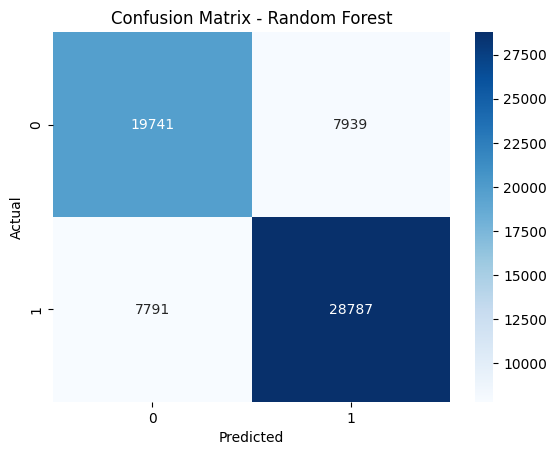

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


ROC Curve - Random Forest

بقيّم منحنى ROC

اداء نموذج الغابه العشوائيه عبر عتبات قرار مختلفه

بوضح المفاضله بين معدل الاستدعاء ومعدل الإيجابيه الكاذبه

وبتعكس المساحه تحت المنحنى قدره النموذج الإجماليه على التمييز بين الحالات المعاد ترتيبها والحالات اللي ما انعاد ترتيبها

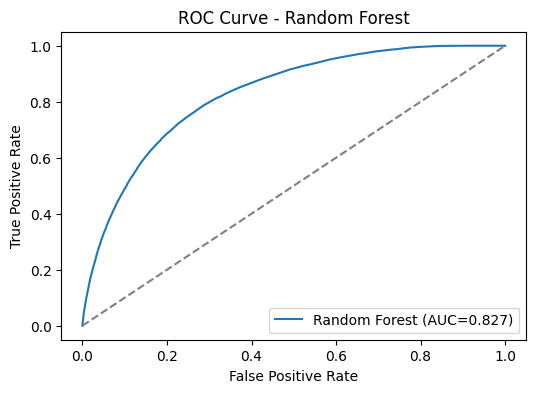

In [38]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, rf_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC={rf_roc_auc:.3f})")
plt.plot([0,1], [0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

**Comparison ROC Curve**



مقارنة منحنى ROC
مع الانحدار اللوجستي باستخدام
XGBoost

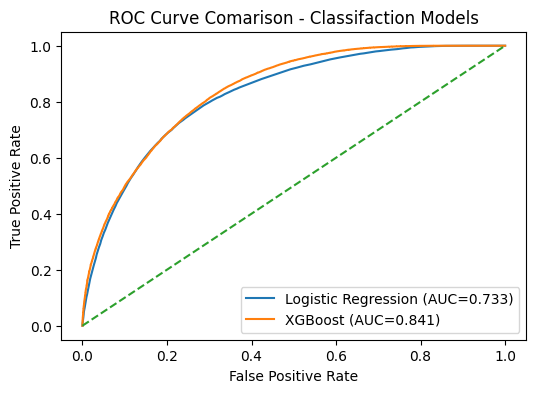

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

xgb_auc = roc_auc_score(y_val, xgb_pred_proba)
fqr_xgb, tqr_xgb, _ = roc_curve(y_val, xgb_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc:.3f})")
plt.plot(fqr_xgb, tqr_xgb, label=f"XGBoost (AUC={xgb_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comarison - Classifaction Models")
plt.legend()
plt.show()

# **Evaluation & Explainability**

 Feature Importance - XGBoost


بتستخدم الدرجات اهمية الميزات من نموذج XGBoost

لتحديد الميزات الاكثر تاثر بالتنبؤ باعادة طلب المنتجات

بتعكس هاي الدرجات مدى تكرار وفعالية استخدام كل ميزة في اشجار القرار الخاصه

بساعد عرض اهم الميزات على فهم سلوك النموذج وبقدم استنتاجات ثاقبه عن العوامل الرئيسيه اللي بتحرك انماط اعادة الطلب

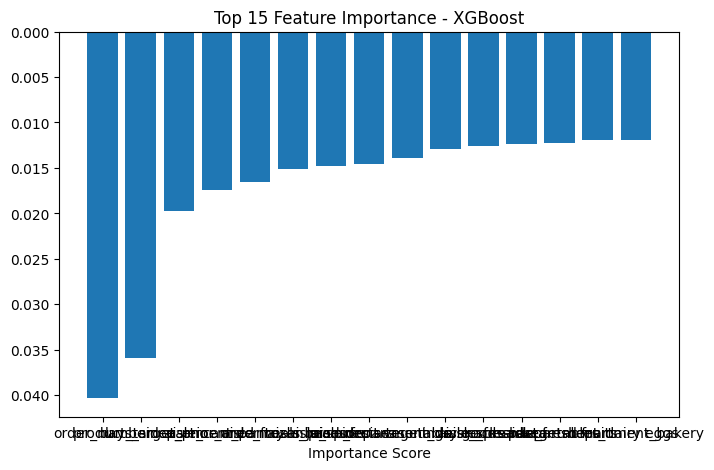

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({"feature": X_train.columns, "importance": importance}).sort_values(by="importance", ascending=False)

feature_importance_df.head(10)


plt.figure(figsize=(8, 5))
plt.bar(feature_importance_df["feature"].head(15), feature_importance_df["importance"].head(15))
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 15 Feature Importance - XGBoost")
plt.show()


SHAP Explainability



بتوضح تاثير نسبي لكل ميزه على قرار النموذج

القيمه الموجبه بتزيد من احتمال اعادة الطلب والقيم السالبه بتقلل الاحتمال

وهيك بتساعد بفهم سلوك النموذج وتفسير قراراته

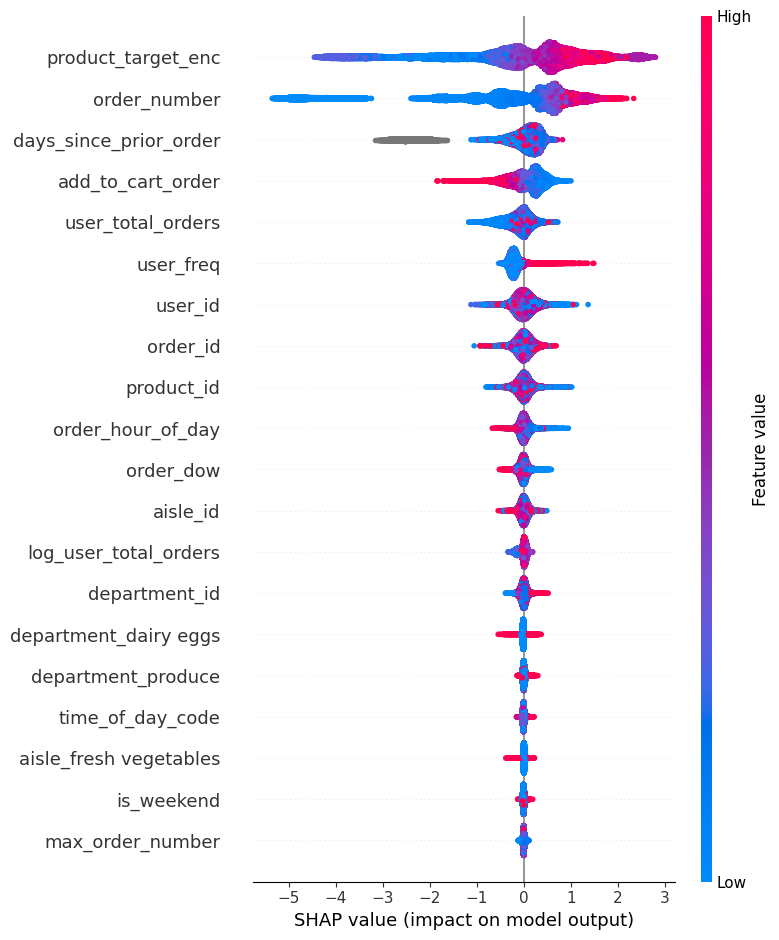

In [41]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)

shap.summary_plot(shap_values, X_val, show=False)

التحليل بوضح انه تصرفات المستخدم زي اعادة الطلب وشعبية المنتج الها دور كبير بتوقع اذا رح ينطلب مرة ثانية وكمان عامل الوقت اله تأثير لانه نمط الطلب بفرق بقرار النموذج

### Model Comparison Summary
نموذج XGBoost تفوق على نموذج الانحدار اللوجستي من ناحية الأداء حسب منحنى ROC لأنه بعرف يتعامل مع العلاقات المعقدة بين الخصائص وبحسن التوقعات مع هيك الانحدار اللوجستي بعده مهم لأنه سهل الفهم ويعتبر أساس قوي

# **Modeling - Regression (Task B)**

Target variable

المتغير المستهدف في مهمة الانحدار هو

"days_since_prior_order"

واللي بمثل عدد الايام بين الطلبات المتتاليه

بتحذف الصفوف اللي بتحتوي على قيم مفقوده للمتغير المستهدف لضمان صحة تدريب الانحدار

بفصل المتغير المستهدف عن مجموعه الميزات وتحذف الاعمده غير ذات صلة


In [42]:
y_train_reg = train_df["days_since_prior_order"]
y_val_reg  = val_df["days_since_prior_order"]

drop_cols_reg = ["days_since_prior_order", "max_order_number"]
X_train_reg = train_df.drop(columns=drop_cols_reg)
X_val_reg   = val_df.drop(columns=drop_cols_reg)


mask_train = ~y_train_reg.isna()
mask_val = ~y_val_reg.isna()

X_train_reg = X_train_reg.loc[mask_train]
y_train_reg = y_train_reg.loc[mask_train]

X_val_reg = X_val_reg.loc[mask_val]
y_val_reg = y_val_reg.loc[mask_val]


Feature Selection and Sampling

بتنحذف الخصائص غير الرقميه لضمان التوافق مع نماذج الانحدار

بالاضافه الى ذلك تؤخذ عينة من بيانات التدريب لتقليل التكلفه الحسابيه

In [43]:
non_numeric_cols=X_train_reg.select_dtypes(include=["object"]).columns
X_train_reg=X_train_reg.drop(columns=non_numeric_cols)
X_val_reg=X_val_reg.drop(columns=non_numeric_cols)

X_train_reg=X_train_reg.sample(frac=0.3,random_state=42)
y_train_reg=y_train_reg.loc[X_train_reg.index]



Baseline Model-Linear Regression

يستخدم الانحدار الخطي كنموذج اساسي لتحديد اداء مرجعي بسيط

بمثل هاض النموذج علاقه خطيه بين متغيرات مدخله والمتغير  المستهدف

بساعد هاض النموذج الاساسي على تقييم سواء كانت نماذج الانحدار الاكثر تعقيد بتحقق تحسينات ملموسه

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train_reg,y_train_reg)

y_pred_reg=lin_reg.predict(X_val_reg)

Evaluation Matrics


يقيّم نموذج الانحدار باستخدام معايير الأداء القياسية التالية:

- متوسط ​​الخطأ المطلق : بقيس متوسط ​​الفرق المطلق بين القيم المتوقعة والقيم الفعلية.

- جذر متوسط ​​مربع الخطأ : بعاقب الأخطاء الكبيرة بشكل أكبر وبعكس دقة التنبؤ الإجمالية.

- معامل التحديد : بشير إلى نسبة التباين في المتغير المستهدف اللي بفسرها النموذج.

بتوفر هاي المعايير تقييمًا لأداء نموذج الانحدار.

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mea = mean_absolute_error(y_val_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_val_reg, y_pred_reg))
r2 = r2_score(y_val_reg, y_pred_reg)
print("Mean Absolute Error:", mea)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 6.863519117221496
Root Mean Squared Error: 8.515357931764887
R-squared: 0.1569471238182687


Actual vs Predicted - Linear Regression

بقارن هاض الرسم البياني المبعثر القيم الفعليه للمتغير المستهدف
مع القيم المتوقعه بواسطة نموذج الانحدار الخطي

التقارب الشديد بدل على طول الخط القطري الى اداء تنبؤي افضل بينما يعكس التشتت اخطاء التنبؤ

بتساعد هاي الرسوم البيانيه على تقييم مدى قدره النموذج على رصد الاتجاه العام للبيانات

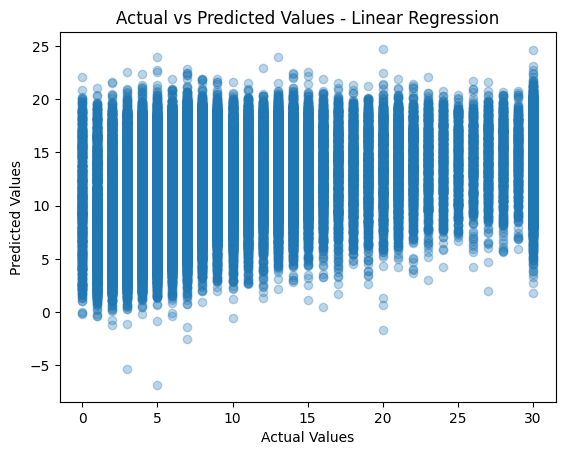

In [46]:
import matplotlib.pyplot as plt

plt.scatter(y_val_reg, y_pred_reg, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Linear Regression")
plt.show()

Residual Plot - Linear Regression

بوضح مخطط البواقي الفرق بين القيم الفعليه والقيم المتوقعه من نموذج الانحدار الخطي

يتم رسم البواقي مقابل القيم المتوقعه لتقييم افتراضات الانحدار الرئيسيه مثل الخطيه وتجانس التباين

بشير التشتت العشوائي للبواقي حول الصفر الى نموذج ملائم بينما قد تشير الأنماط الظاهره الى قيود بالنموذج او علاقات غير حطيه

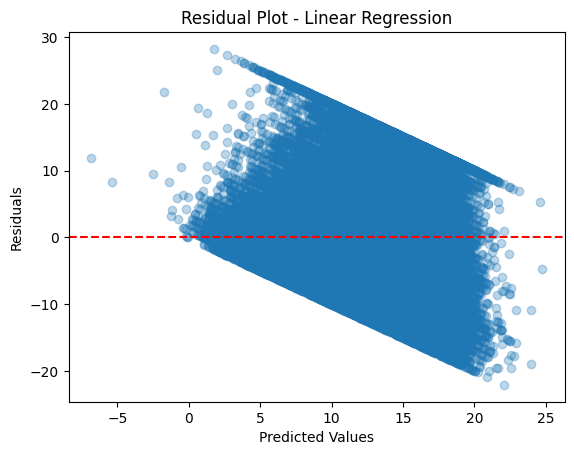

In [47]:
residuals = y_val_reg - y_pred_reg

plt.scatter(y_pred_reg, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()